# **TUGAS ANALISIS BIG DATA**

# **EDA (Exploratory Data Analysis)**

In [138]:
#Importing Library
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import missingno as msno

In [139]:
#Laod Data
assessments = pd.read_csv("dataset/assessments.csv")
courses = pd.read_csv("dataset/courses.csv")
studentAssessment = pd.read_csv("dataset/studentAssessment.csv")
studentInfo = pd.read_csv("dataset/studentInfo.csv")
studentRegistration = pd.read_csv("dataset/studentRegistration.csv")
studentVle = pd.read_csv("dataset/studentVle.csv")
vle = pd.read_csv("dataset/vle.csv")

**ASSESMENTS**

In [140]:
#Menampilkan 5 Data Teratas
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [141]:
#Menampilkan 5 Data Terbawah
assessments.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [142]:
#Menampilkan Metadata assessments
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [143]:
#Menampilkan Jumlah Row dan Column
assessments.shape

(206, 6)

In [144]:
#Memeriksa Duplikasi
duplicate_rows_assessments = assessments[assessments.duplicated()]
print("number of duplicate rows: ", duplicate_rows_assessments.shape)

number of duplicate rows:  (0, 6)


In [145]:
#Memeriksa Missing Value
print(assessments.isnull().sum())

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [146]:
#Mengisi missing values "date" menggunakan mean
assessments['date'] = assessments['date'].fillna(int(assessments['date'].astype(float).mean()))

In [147]:
#Ada 7 tipe di code_module
assessments['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [148]:
### Ada 3 tipe assessments
# TMA :- Tutor Marked Assessment
# CMA :- Computer Marked Assessment
# Exam :- Final Exam

assessments['assessment_type'].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

(array([29., 25., 22., 34., 20., 32., 44.]),
 array([ 12.        ,  47.57142857,  83.14285714, 118.71428571,
        154.28571429, 189.85714286, 225.42857143, 261.        ]),
 <BarContainer object of 7 artists>)

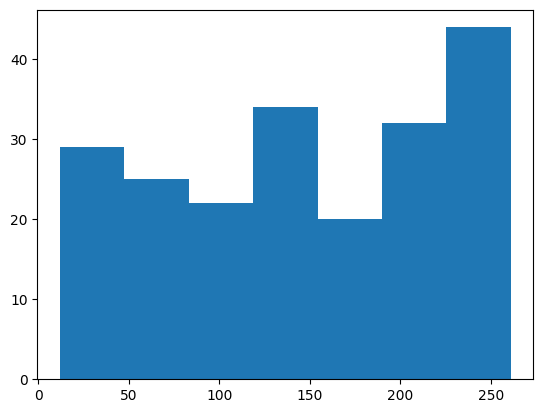

In [149]:
#Histogram di bawah ini menunjukkan kepada kita kisaran angka selama berhari-hari untuk pengiriman akhir.

plt.hist(assessments['date'].astype(int), bins=7)

**COURSES**

In [150]:
#Menampilkan 5 Data Teratas
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [151]:
#Menampilkan 5 Data Terbawah
courses.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


In [152]:
#Menampilkan Metadata assessments
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [153]:
#Menampilkan Jumlah Row dan Column
courses.shape

(22, 3)

In [154]:
#Memeriksa Duplikasi
duplicate_rows_courses = courses[courses.duplicated()]
print("number of duplicate rows: ", duplicate_rows_courses.shape)

number of duplicate rows:  (0, 3)


In [155]:
#Memeriksa Missing Value
print(courses.isnull().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


**STUDENT ASSESSMENTS**

In [156]:
#Menampilkan 5 Data Teratas
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [157]:
#Menampilkan 5 Data Terbawah
studentAssessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [158]:
#Menampilkan Metadata assessments
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [159]:
#Menampilkan Jumlah Row dan Column
studentAssessment.shape

(173912, 5)

In [160]:
#Memeriksa Duplikasi
duplicate_rows_studentAssessment = studentAssessment[studentAssessment.duplicated()]
print("number of duplicate rows: ", duplicate_rows_studentAssessment.shape)

number of duplicate rows:  (0, 5)


In [161]:
#Memeriksa Missing Value
print(studentAssessment.isnull().sum())

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


**STUDENT INFO**

In [162]:
#Menampilkan 5 Data Teratas
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [163]:
#Menampilkan 5 Data Terbawah
studentInfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [164]:
#Menampilkan Metadata assessments
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [165]:
#Menampilkan Jumlah Data di Tiap Fitur
studentInfo.count()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                31482
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

In [166]:
##Memeriksa Duplikasi
duplicate_rows_studentInfo = studentInfo[studentInfo.duplicated()]
print("number of duplicate rows: ", duplicate_rows_studentInfo.shape)

number of duplicate rows:  (0, 12)


In [167]:
#Memeriksa Missing Value
print(studentInfo.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [168]:
### Ada nilai yang hilang di imd_band. Karena mereka mewakili band di mana mereka berada, kita dapat memikirkan mereka 
### seperti kategori dan kita dapat mengisi nilai yang hilang dengan mode

print(studentInfo['imd_band'].unique())

studentInfo['imd_band'] = studentInfo['imd_band'].fillna(studentInfo['imd_band'].mode()[0])

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']


In [169]:
#Memeriksa Missing Value
print(studentInfo.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


**STUDENT REGISTRATION**

In [170]:
#Menampilkan 5 Data Teratas
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [171]:
#Menampilkan 5 Data Terbawah
studentRegistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [172]:
#Menampilkan Metadata assessments
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [173]:
#Menampilkan Jumlah Data di Tiap Fitur
studentRegistration.count()

code_module            32593
code_presentation      32593
id_student             32593
date_registration      32548
date_unregistration    10072
dtype: int64

In [174]:
##Memeriksa Duplikasi
duplicate_rows_studentRegistration = studentRegistration[studentRegistration.duplicated()]
print("number of duplicate rows: ", duplicate_rows_studentRegistration.shape)

number of duplicate rows:  (0, 5)


In [175]:
#Memeriksa Missing Value
print(studentRegistration.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [176]:
## Dari uraian tersebut jelas bahwa jika nilai hilang di kolom date_unregistration maka itu berarti siswa
## menyelesaikan kursus dan jika batal maka siswa ditarik dari kursus

## 0 : 'SELESAI'
## 1: 'DITARIK'

## Ada sangat sedikit nilai yang hilang di kolom data_registration. Saya menggantinya dengan 0 

studentRegistration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in studentRegistration['date_unregistration']]
studentRegistration['date_registration']   = studentRegistration['date_registration'].fillna(0).astype(float).apply(abs)

In [177]:
#Memeriksa Missing Value
print(studentRegistration.isnull().sum())

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


**STUDENT VLE**

In [178]:
#Menampilkan 5 Data Teratas
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [179]:
#Menampilkan 5 Data Terbawah
studentVle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [180]:
#Menampilkan Metadata assessments
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [181]:
#Menampilkan Jumlah Data di Tiap Fitur
studentVle.count()

code_module          10655280
code_presentation    10655280
id_student           10655280
id_site              10655280
date                 10655280
sum_click            10655280
dtype: int64

In [182]:
##Memeriksa Duplikasi
duplicate_rows_studentVle = studentVle[studentVle.duplicated()]
print("number of duplicate rows: ", duplicate_rows_studentVle.shape)

number of duplicate rows:  (787170, 6)


In [183]:
#Memeriksa Missing Value
print(studentVle.isnull().sum())

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


**VLE**

In [184]:
#Menampilkan 5 Data Teratas
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [185]:
#Menampilkan 5 Data Terbawah
vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [186]:
#Menampilkan Jumlah Row dan Column
vle.shape

(6364, 6)

In [187]:
#Memeriksa Apakah Ada Data Yang Duplikat
duplicate_rows_vle = vle[vle.duplicated()]
print("number of duplicate rows: ", duplicate_rows_vle.shape)

number of duplicate rows:  (0, 6)


In [188]:
#Menampilkan Jumlah Data di Tiap Fitur
vle.count()

id_site              6364
code_module          6364
code_presentation    6364
activity_type        6364
week_from            1121
week_to              1121
dtype: int64

In [189]:
#Memeriksa Missing Value
print(vle.isnull().sum())

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [190]:
### Seperti yang dapat kita lihat bahwa ada hampir 80% nilai yang hilang di kolom week_from dan week_to
### Jadi saya akan menghapus kolom-kolom itu

vle = vle.drop(['week_from', 'week_to'], axis = 1)

In [191]:
#Memeriksa Missing Value
print(vle.isnull().sum())

id_site              0
code_module          0
code_presentation    0
activity_type        0
dtype: int64


In [192]:
#Menampilkan Kembali 5 Data Teratas
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


In [193]:
vle.describe()

,id_site
count,6.364000e+03
mean,7.260991e+05
std,1.283151e+05
min,5.267210e+05
25%,6.615928e+05
50%,7.300965e+05
75%,8.140162e+05
max,1.077905e+06


<Axes: >

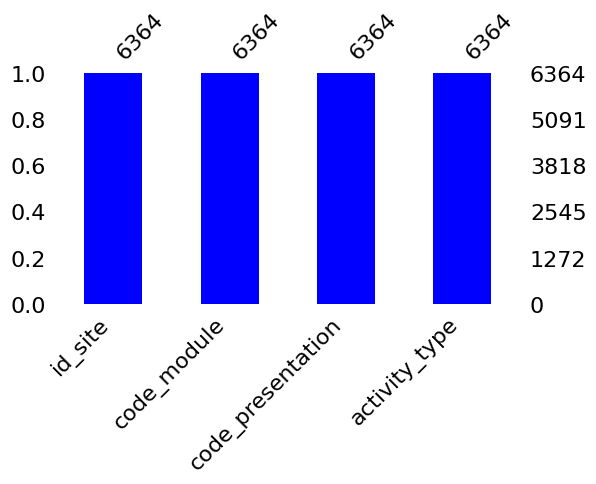

In [194]:
msno.bar(vle,figsize=(6,3),color='blue')

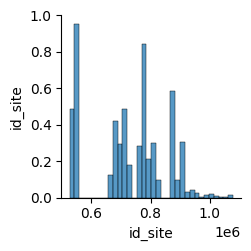

In [195]:
sns.pairplot(vle)